<a href="https://colab.research.google.com/github/williserdman/Radar-Material-Detection-Exploration/blob/main/radar_cup_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import h5py

In [44]:
%pip install acconeer-exptool

In [59]:
from acconeer.exptool import a121
record = a121.load_record("distances/glass.h5")
record.extended_stacked_results

[{1: StackedResults(data_saturated=array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, F

In [213]:
def process_h5(record):
  data = []
  for elm in record.extended_stacked_results:
    dframe = [elm[key].frame for key in elm.keys()]
    dframe = np.array(dframe)
    #data.append(dframe)
  return np.squeeze(abs(dframe))

In [214]:
glass_record = a121.load_record("distances/glass.h5")
empty_record = a121.load_record("distances/empty.h5")
metal_record = a121.load_record("distances/metal.h5")
paper_record = a121.load_record("distances/paper.h5")

In [ ]:
process_h5(glass_record)

In [221]:
from scipy.signal import find_peaks
def feature_extraction(test_data):
  data = []
  for i in test_data:
    peaks, _ = find_peaks(i)
    #print(peaks)
    sorted_peaks = peaks[np.argsort(i[peaks])][::-1]
    top_two_peaks = sorted_peaks[:2]
    #print("Indices of the two peaks:", top_two_peaks)
    #print("Values of the two peaks:", i[top_two_peaks])
    features = i[top_two_peaks].tolist()
    features.append(top_two_peaks[0] / top_two_peaks[1])
    data.append(features)
  return data, len(data)

In [222]:
feature_extraction(process_h5(glass_record))

([[96.0052081920559, 28.792360097775934, 0.625],
  [93.50935782048768, 24.73863375370596, 0.5833333333333334],
  [95.35197952848173, 27.85677655436824, 0.625],
  [90.08884503644165, 24.041630560342615, 0.625],
  [92.02173656261873, 21.840329667841555, 0.5833333333333334],
  [94.36630754670863, 28.23118842698621, 0.56],
  [91.00549433962766, 23.259406699226012, 0.6],
  [92.61749294814669, 25.298221281347036, 0.5833333333333334],
  [99.02019995940223, 25.495097567963924, 0.5833333333333334],
  [95.46203433826456, 21.095023109728988, 0.56],
  [92.61749294814669, 26.92582403567252, 0.56],
  [92.09777413162601, 25.298221281347036, 0.5833333333333334],
  [92.9569792968769, 25.059928172283335, 0.56],
  [95.524865872714, 26.0, 0.56],
  [93.23625904121207, 25.238858928247925, 0.56],
  [96.76776322722355, 26.419689627245813, 0.6],
  [89.1403387922662, 21.18962010041709, 0.56],
  [93.08598175880189, 23.259406699226012, 0.6],
  [92.63368717696603, 23.769728648009426, 0.56],
  [91.78235124467014, 2

In [223]:
gd, gl = feature_extraction(process_h5(glass_record))
ed, el = feature_extraction(process_h5(empty_record))
md, ml = feature_extraction(process_h5(metal_record))
pd, pl = feature_extraction(process_h5(paper_record))

data = gd + ed + md + pd
labels = ["glass"] * gl + ["empty"] * el + ["metal"] * ml + ["paper"] * pl

In [230]:
len(data), len(labels)

(487, 487)

In [231]:
data = np.array(data)
labels = np.array(labels)

In [253]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [249]:
X_test, y_test

(array([[9.23146792e+01, 2.81780056e+01, 5.60000000e-01],
        [3.32132504e+02, 1.00000000e+01, 7.00000000e+00],
        [9.70824392e+01, 3.15753068e+01, 6.81818182e-01],
        [9.10494371e+01, 2.40416306e+01, 5.60000000e-01],
        [1.02649890e+02, 3.51710108e+01, 7.14285714e-01],
        [1.06404887e+02, 3.06757233e+01, 6.81818182e-01],
        [1.28062485e+01, 7.21110255e+00, 5.00000000e-01],
        [9.20217366e+01, 2.59422435e+01, 5.60000000e-01],
        [9.43663075e+01, 2.73130006e+01, 6.25000000e-01],
        [3.41774780e+02, 8.60232527e+00, 2.80000000e+00],
        [9.54620343e+01, 2.10950231e+01, 5.60000000e-01],
        [9.33809402e+01, 2.69258240e+01, 5.60000000e-01],
        [1.01138519e+02, 3.56931366e+01, 7.14285714e-01],
        [9.68297475e+01, 3.25576412e+01, 6.81818182e-01],
        [3.31882509e+02, 9.21954446e+00, 7.00000000e+00],
        [1.03966341e+02, 3.31360831e+01, 6.81818182e-01],
        [1.01862653e+02, 3.01496269e+01, 7.14285714e-01],
        [9.276

In [254]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

# Train classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [255]:
clf.predict([[9.23146792e+01, 2.81780056e+01, 5.60000000e-01]])[0]

'glass'

In [256]:
single_tree = tree.DecisionTreeClassifier()
single_tree.fit(X_train, y_train)

single_y_pred = single_tree.predict(X_test)
single_accuracy = accuracy_score(y_test, single_y_pred)
print(f'Accuracy: {single_accuracy}')

Accuracy: 1.0


[Text(0.625, 0.9, 'x[0] <= 215.37\ngini = 0.739\nsamples = 389\nvalue = [65, 120, 104, 100]'),
 Text(0.5, 0.7, 'x[1] <= 28.337\ngini = 0.648\nsamples = 285\nvalue = [65, 120, 0, 100]'),
 Text(0.25, 0.5, 'x[1] <= 15.223\ngini = 0.464\nsamples = 184\nvalue = [65, 118, 0, 1]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 65\nvalue = [65, 0, 0, 0]'),
 Text(0.375, 0.3, 'x[0] <= 102.586\ngini = 0.017\nsamples = 119\nvalue = [0, 118, 0, 1]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 118\nvalue = [0, 118, 0, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]'),
 Text(0.75, 0.5, 'x[2] <= 0.626\ngini = 0.039\nsamples = 101\nvalue = [0, 2, 0, 99]'),
 Text(0.625, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 99\nvalue = [0, 0, 0, 99]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 104\nvalue = [0, 0, 104, 0]')]

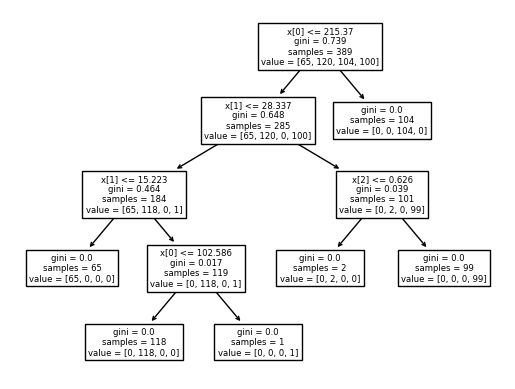

In [257]:
tree.plot_tree(single_tree)